## **Trabajo Final Grupal: Machine Learning - Bank Subscription**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

Alumnos: Franco, Olivia (172.434-4) y Muñoz Little, Santiago (168.113-8)

El presente trabajo práctico tiene el objetivo de generar un modelo de aprendizaje que permita predecir si los diversos individuos se suscriben o no a la camapaña de marketing de un banco. Previo al modelo, debemos realizar el pre-procesamiento, filtrando nulos, unknowns y generando dummies para las variables categóricas. 

#### Variables
- Age: edad del cliente.
- Job: tipo de empleo del cliente.
- Marital status: estado civil.
- Education: educación máxima alcanzada por el cliente.
- Credit: si tiene deuda de crédito o no.
- Balance: Promedio de salgo en la cuenta en el año.
- Housing loan: si tiene seguro de hogar o no.
- Personal loan: si tiene préstamos o no.
- Contact: tipo de contacto con el cliente.
- Last contact day: último dia de contacto con el cliente en el mes.
- Last contact month: último mes de contacto con el cliente en el año.
- Last contact duration: duración del último contacto con el cliente medido en segundos.
- Campaign: cantidad de contactos al cliente durante esta campaña, incluye el último contacto.
- Pdays: cantidad de días que pasaron del último contacto con el cliente de una campaña anterior (-1 significa que no hubo contacto previo).
- Previous: cantidad de contactos previos a esta campaña para cada cliente.
- Poutcome: performance de la campaña de marketing anterior para este cliente.
- Subscription: Si el cliente accede a la campaña (1) o no (0).


### Importación de librerías

In [1]:
## Importamos librerías de manipulación de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Importamos librerías de aprendizaje supervisado de clasificación
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn import preprocessing, svm

### Importación de dataset

In [64]:
# Importamos el dataset y lo guardamos bajo el nombre 'bankdf'
bankdf = pd.read_csv('bank_subscription.csv', sep=";")
# Visualizamos las primeras 5 filas para asegurar que se hayan cargado correctamente
bankdf.head(10)

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58.0,NaN,NaN,NaN,no,2143.0,yes,NaN,unknown,5,may,261.0,1,-1.0,0,unknown,0
1,44.0,technician,single,secondary,no,NaN,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,0
2,33.0,entrepreneur,NaN,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,NaN,0,unknown,0
3,47.0,NaN,married,unknown,no,1506.0,NaN,no,unknown,5,may,92.0,1,-1.0,0,unknown,0
4,33.0,unknown,single,unknown,NaN,1.0,no,no,unknown,5,may,NaN,1,NaN,0,unknown,0
5,35.0,NaN,married,tertiary,no,231.0,yes,no,unknown,5,may,139.0,1,-1.0,0,unknown,0
6,28.0,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217.0,1,-1.0,0,unknown,0
7,42.0,entrepreneur,divorced,tertiary,yes,NaN,yes,no,unknown,5,may,380.0,1,-1.0,0,unknown,0
8,58.0,retired,married,NaN,no,121.0,yes,no,unknown,5,may,50.0,1,-1.0,0,unknown,0
9,43.0,technician,single,secondary,no,593.0,yes,no,unknown,5,may,55.0,1,-1.0,0,unknown,0


In [65]:
# Imprimimos las dimensiones del dataset
bankdf.shape

(45211, 17)

In [66]:
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    40238 non-null  float64
 1   Job                    40238 non-null  object 
 2   Marital Status         40238 non-null  object 
 3   Education              40238 non-null  object 
 4   Credit                 40238 non-null  object 
 5   Balance (euros)        40238 non-null  float64
 6   Housing Loan           37525 non-null  object 
 7   Personal Loan          37525 non-null  object 
 8   Contact                45211 non-null  object 
 9   Last Contact Day       45211 non-null  int64  
 10  Last Contact Month     45211 non-null  object 
 11  Last Contact Duration  37525 non-null  float64
 12  Campaign               45211 non-null  int64  
 13  Pdays                  37525 non-null  float64
 14  Previous               45211 non-null  int64  
 15  Po

### **Ingeniería de Atributos**
A continuación se presentan las transformaciones y el análisis para tomar decisiones sobre ellas. 

In [67]:
# Revisamos si existen columnas que contengan valores faltantes (NaNs)
col_nulls = bankdf.isnull().any()
col_nulls

Age                       True
Job                       True
Marital Status            True
Education                 True
Credit                    True
Balance (euros)           True
Housing Loan              True
Personal Loan             True
Contact                  False
Last Contact Day         False
Last Contact Month       False
Last Contact Duration     True
Campaign                 False
Pdays                     True
Previous                 False
Poutcome                 False
Subscription             False
dtype: bool

Dado que gran cantidad de features poseen nulos, debemos analizar la cantidad de nulos por cada una y decidir si conviene eliminar la columna por tener gran concetración de nulos, solamente los registros con los nulos o imputar valores a dichos nulos. Además, se observa la presencia de valores "unknown" en las distintas variables que, de manera implícita, también representan nulos ya que no dan información, por lo que debemos sumarlos al análisis.

In [68]:
# Cantidad de valores nulos
null_counts = bankdf.isnull().sum().sort_values(ascending=False)
# Cantidad de valores unknown
unknown_counts = bankdf.apply(lambda x: x.value_counts().get('unknown', 0))
# Suma del total de nulos y unknown por cada columna
sum_nulls_unknowns = bankdf.isnull().sum()+bankdf.apply(lambda x: x.value_counts().get('unknown', 0))
# Porcentaje de lo que representa para cada columna
percent = (sum_nulls_unknowns/len(bankdf))
# Mostramos los cuatro resultados en conjunto
datosfaltantes = pd.concat([null_counts,unknown_counts,sum_nulls_unknowns, percent], axis=1, keys=['Nulls','Unknown', 'Sum','Percent'])
datosfaltantes = datosfaltantes.sort_values(by='Percent', ascending=False)
datosfaltantes

,Nulls,Unknown,Sum,Percent
Poutcome,0,36959,36959,0.817478
Contact,0,13020,13020,0.287983
Pdays,7686,0,7686,0.170003
Housing Loan,7686,0,7686,0.170003
Personal Loan,7686,0,7686,0.170003
Last Contact Duration,7686,0,7686,0.170003
Education,4973,1666,6639,0.146845
Job,4973,257,5230,0.115680
Balance (euros),4973,0,4973,0.109995
Credit,4973,0,4973,0.109995


In [69]:
# Obtenemos el tipo de variable de cada columna para saber cuáles pueden ser reemplazados por la media
tipos_de_variables = bankdf.dtypes
tipos_de_variables

Age                      float64
Job                       object
Marital Status            object
Education                 object
Credit                    object
Balance (euros)          float64
Housing Loan              object
Personal Loan             object
Contact                   object
Last Contact Day           int64
Last Contact Month        object
Last Contact Duration    float64
Campaign                   int64
Pdays                    float64
Previous                   int64
Poutcome                  object
Subscription               int64
dtype: object

In [70]:
# Obtenemos los valores únicos de la variable poutcome para analizar si debemos eliminarla
valores_unicos_po = bankdf['Poutcome'].unique()
print('Los valores únicos de la variable Poutcome son:', valores_unicos_po)
# Obtenemos los valores únicos de la variable contact para analizar si debemos eliminarla
valores_unicos_co = bankdf['Contact'].unique()
print('Los valores únicos de la variable Contact son:', valores_unicos_co)

Los valores únicos de la variable Poutcome son: ['unknown' 'failure' 'other' 'success']
Los valores únicos de la variable Contact son: ['unknown' 'cellular' 'telephone']


Como conclusión de la tabla presentada, vemos que eliminar todos los nulos afectaría notablemente al rendimiento de nuestro dataset ya que perderíamos gran parte de los registros. Por lo tanto, tomamos la decisión de imputar la media a todas las variables numéricas que tengan nulos, tales como Age, Balance y Last Contact Duration.

Por otro lado, creemos que la feature 'Poutcome' no brinda información, ya que, por más que puede resultar sumamente importante el outcome de la campaña anterior, el 81,7% de los datos son "unknown"; por lo tanto, se procede a eliminar la columna. Lo mismo sucede con la columna contact, ya que hay un 28,7% de los valores que son "unknown" y los otros dos valores existentes son "celular" y "telefono" (variables similares y poco informativas); por lo que se procede a eliminar la columna. 

Asimismo, dado que Pdays tiene gran cantidad de valores -1 (como se vio en el EDA) y que -1 no representa correctamente la naturaleza de la distribución, sino que es un valor asignado por el operador de manera arbitraria, creemos que esta columna debe ser transformada para evitar que el modelo aprenda valores no representativos. En un experimento inicial se intentó borrar la columna, pero el rendimiento del modelo bajó notoriamente, por lo que decidimos generar rangos de contacto para no perder totalmente la información brindada por esta columna.

Para el resto de las variables categóricas con nulos, dado que la cantidad de nulos no supera el 20% del dataset, tomamos la decisión de eliminar los registros, ya que imputar la moda a tal cantidad de datos puede resultar perjudicial para la variabilidad del dataset. El mismo tratamiento se hará con los valores "unknown".

In [71]:
bankdf1=bankdf

# Creamos los rangos para cada grupo de contacto
bankdf1.loc[bankdf1['Pdays'] < 0, 'Prango'] = 'Sin Contacto'
bankdf1.loc[(bankdf1['Pdays'] > 0) & (bankdf1['Pdays'] <= 120), 'Prango'] = 'Contacto Cuatrimestre'
bankdf1.loc[bankdf1['Pdays'] > 120, 'Prango'] = 'Contacto Largo Plazo'

# Exportamos las primeras 5 filas para asegurar la correcta clasificación
bankdf1.head()


,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription,Prango
0,58.0,NaN,NaN,NaN,no,2143.0,yes,NaN,unknown,5,may,261.0,1,-1.0,0,unknown,0,Sin Contacto
1,44.0,technician,single,secondary,no,NaN,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,0,Sin Contacto
2,33.0,entrepreneur,NaN,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,NaN,0,unknown,0,NaN
3,47.0,NaN,married,unknown,no,1506.0,NaN,no,unknown,5,may,92.0,1,-1.0,0,unknown,0,Sin Contacto
4,33.0,unknown,single,unknown,NaN,1.0,no,no,unknown,5,may,NaN,1,NaN,0,unknown,0,NaN


In [72]:
# Eliminamos las  columnas Contact, Poutcome y Pdays del dataset
bankdf1 = bankdf1.drop(['Contact','Poutcome','Pdays'], axis=1)
# Visualizamos que se hayan eliminado correctamente
bankdf1.head(10)

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Previous,Subscription,Prango
0,58.0,NaN,NaN,NaN,no,2143.0,yes,NaN,5,may,261.0,1,0,0,Sin Contacto
1,44.0,technician,single,secondary,no,NaN,yes,no,5,may,151.0,1,0,0,Sin Contacto
2,33.0,entrepreneur,NaN,secondary,no,2.0,yes,yes,5,may,76.0,1,0,0,NaN
3,47.0,NaN,married,unknown,no,1506.0,NaN,no,5,may,92.0,1,0,0,Sin Contacto
4,33.0,unknown,single,unknown,NaN,1.0,no,no,5,may,NaN,1,0,0,NaN
5,35.0,NaN,married,tertiary,no,231.0,yes,no,5,may,139.0,1,0,0,Sin Contacto
6,28.0,management,single,tertiary,no,447.0,yes,yes,5,may,217.0,1,0,0,Sin Contacto
7,42.0,entrepreneur,divorced,tertiary,yes,NaN,yes,no,5,may,380.0,1,0,0,Sin Contacto
8,58.0,retired,married,NaN,no,121.0,yes,no,5,may,50.0,1,0,0,Sin Contacto
9,43.0,technician,single,secondary,no,593.0,yes,no,5,may,55.0,1,0,0,Sin Contacto


Vemos que, de las variables que tienen nulos, 'Last Contact Duration', 'Balance' y 'Age' son variables numéricas, por lo que pueden ser reemplazadas por la media. 

In [73]:
# Definimos qué columnas son las que se reemplazan
columnas_a_procesar = ['Last Contact Duration', 'Balance (euros)','Age']

# Iteramos sobre cada columna y reemplazamos los nulos con la media
for columna in columnas_a_procesar:
    media_columna = bankdf1[columna].mean()
    bankdf1[columna] = bankdf1[columna].fillna(media_columna)

# Revisamos si las columnas procesadas efectivamente no tienen más nulos
col_nulls = bankdf1.isnull().any()
print(col_nulls)

# Imprimimos las dimensiones del dataset
print('Las dimensiones del dataset son: ', bankdf1.shape)

Age                      False
Job                       True
Marital Status            True
Education                 True
Credit                    True
Balance (euros)          False
Housing Loan              True
Personal Loan             True
Last Contact Day         False
Last Contact Month       False
Last Contact Duration    False
Campaign                 False
Previous                 False
Subscription             False
Prango                    True
dtype: bool
Las dimensiones del dataset son:  (45211, 15)


Observamos que las variables corregidas ya no tienen valores nulos y que, además, todavía no se perdieron muestras ya que no eliminamos registros. Ahora si, procederemos a eliminar los registros de las variables que son objects, es decir, cadena de textos. Las columnas afectadas en este proceso serán Job, Marital Status, Education, Credit, Housing Loan, Personal Loan y Prango. El mismo tratamiento se realiza para los unknowns de las columnas Job y Education. 

In [75]:
# Definimos las columnas a afectar
columnas_afectadas = ['Job', 'Marital Status', 'Education', 'Credit', 'Housing Loan','Personal Loan','Prango']

# Eliminamos registros que no cumplen con el thresh
bankdf1 = bankdf1.dropna(subset=columnas_afectadas)
    
# Definimos las columnas a afectar
columnas_a_modificar = ['Job', 'Education']

# Iteramos sobre cada columna y borramos las que son unknown
filas_unknown = bankdf1[bankdf1[columnas_a_modificar].apply(lambda row: 'unknown' in row.values, axis=1)]

# Eliminamos las filas encontradas usando .drop
bankdf1 = bankdf1.drop(filas_unknown.index)

# Revisamos si las columnas procesadas efectivamente no tienen más nulos
col_nulls = bankdf1.isnull().any()
print(col_nulls)

# Imprimimos las dimensiones del dataset
print('Las dimensiones del dataset son: ', bankdf1.shape)

# Visualizamos el dataset
bankdf1.head(10)

Age                      False
Job                      False
Marital Status           False
Education                False
Credit                   False
Balance (euros)          False
Housing Loan             False
Personal Loan            False
Last Contact Day         False
Last Contact Month       False
Last Contact Duration    False
Campaign                 False
Previous                 False
Subscription             False
Prango                   False
dtype: bool
Las dimensiones del dataset son:  (15446, 15)


,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Previous,Subscription,Prango
1,44.0,technician,single,secondary,no,1367.154257,yes,no,5,may,151.000000,1,0,0,Sin Contacto
6,28.0,management,single,tertiary,no,447.000000,yes,yes,5,may,217.000000,1,0,0,Sin Contacto
7,42.0,entrepreneur,divorced,tertiary,yes,1367.154257,yes,no,5,may,380.000000,1,0,0,Sin Contacto
9,43.0,technician,single,secondary,no,593.000000,yes,no,5,may,55.000000,1,0,0,Sin Contacto
11,29.0,admin.,single,secondary,no,390.000000,yes,no,5,may,258.511446,1,0,0,Sin Contacto
14,57.0,services,married,secondary,no,162.000000,yes,no,5,may,174.000000,1,0,0,Sin Contacto
23,25.0,services,married,secondary,no,50.000000,yes,no,5,may,342.000000,1,0,0,Sin Contacto
24,40.0,retired,married,primary,no,0.000000,yes,yes,5,may,181.000000,1,0,0,Sin Contacto
30,57.0,technician,married,secondary,no,839.000000,no,yes,5,may,225.000000,1,0,0,Sin Contacto
31,49.0,management,married,tertiary,no,1367.154257,yes,no,5,may,230.000000,1,0,0,Sin Contacto


Habiendo tratado todos los nulos, permanece el 34% de las muestras del dataset. Ahora, debemos continuar filtrando los outliers del dataset, para evitar que estas anomalías afecten al modelo. Como fue observado en el EDA, las dos variables que presentan anomalías llamativas son Balance y Last Contact Duration, por lo que son las que vamos a filtrar. 

In [76]:
#Primero definimos qué valores pertenecen a cada percentil.
percentil_99 = bankdf1['Balance (euros)'].quantile(0.99)
percentil_1 = bankdf1['Balance (euros)'].quantile(0.01)

# Filtramos los outliers
bankdf1 = bankdf1.loc[(bankdf1['Balance (euros)']>=percentil_1)&(bankdf1['Balance (euros)']<=percentil_99)]

#Primero definimos qué valores pertenecen a cada percentil.
percentil_99 = bankdf1['Last Contact Duration'].quantile(0.99)
percentil_1 = bankdf1['Last Contact Duration'].quantile(0.01)

# Filtramos los outliers
bankdf1 = bankdf1.loc[(bankdf1['Last Contact Duration']>=percentil_1)&(bankdf1['Last Contact Duration']<=percentil_99)]

#Visualizamos el dataset
bankdf1

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Previous,Subscription,Prango
1,44.0,technician,single,secondary,no,1367.154257,yes,no,5,may,151.000000,1,0,0,Sin Contacto
6,28.0,management,single,tertiary,no,447.000000,yes,yes,5,may,217.000000,1,0,0,Sin Contacto
7,42.0,entrepreneur,divorced,tertiary,yes,1367.154257,yes,no,5,may,380.000000,1,0,0,Sin Contacto
9,43.0,technician,single,secondary,no,593.000000,yes,no,5,may,55.000000,1,0,0,Sin Contacto
11,29.0,admin.,single,secondary,no,390.000000,yes,no,5,may,258.511446,1,0,0,Sin Contacto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23.0,student,single,tertiary,no,113.000000,no,no,17,nov,266.000000,1,0,1,Sin Contacto
45205,25.0,technician,single,secondary,no,505.000000,no,yes,17,nov,386.000000,2,0,1,Sin Contacto
45207,71.0,retired,divorced,primary,no,1729.000000,no,no,17,nov,456.000000,2,0,1,Sin Contacto
45208,72.0,retired,married,secondary,no,5715.000000,no,no,17,nov,1127.000000,5,3,1,Contacto Largo Plazo


Por último, avanzaremos transformando las columnas para convertir las variables categóricas en numéricas, de modo que puedan ser procesadas y aprendidas por el modelo. 

In [77]:
# Obtenemos los valores únicos de la variable Job
valores_unicos_job = bankdf1['Job'].unique()
print('Los valores únicos de la variable Job son:', valores_unicos_job)
# Obtenemos los valores únicos de la variable Marital Status
valores_unicos_ms = bankdf1['Marital Status'].unique()
print('Los valores únicos de la variable Marital Status son:', valores_unicos_ms)
# Obtenemos los valores únicos de la variable Education
valores_unicos_ed = bankdf1['Education'].unique()
print('Los valores únicos de la variable Education son:', valores_unicos_ed)
# Obtenemos los valores únicos de la variable Credit
valores_unicos_cr = bankdf1['Credit'].unique()
print('Los valores únicos de la variable Credit son:', valores_unicos_cr)
# Obtenemos los valores únicos de la variable Housing Loan
valores_unicos_hs = bankdf1['Housing Loan'].unique()
print('Los valores únicos de la variable Housing Loan son:', valores_unicos_hs)
# Obtenemos los valores únicos de la variable Personal Loan
valores_unicos_ps = bankdf1['Personal Loan'].unique()
print('Los valores únicos de la variable Personal Loan son:', valores_unicos_ps)
# Obtenemos los valores únicos de la variable Last Contact Month
valores_unicos_lcm = bankdf1['Last Contact Month'].unique()
print('Los valores únicos de la variable Last Contact Month son:', valores_unicos_lcm)
# Obtenemos los valores únicos de la variable Prango
valores_unicos_pr = bankdf1['Prango'].unique()
print('Los valores únicos de la variable Prango son:', valores_unicos_pr)

Los valores únicos de la variable Job son: ['technician' 'management' 'entrepreneur' 'admin.' 'services' 'retired'
 'blue-collar' 'housemaid' 'unemployed' 'student' 'self-employed']
Los valores únicos de la variable Marital Status son: ['single' 'divorced' 'married']
Los valores únicos de la variable Education son: ['secondary' 'tertiary' 'primary']
Los valores únicos de la variable Credit son: ['no' 'yes']
Los valores únicos de la variable Housing Loan son: ['yes' 'no']
Los valores únicos de la variable Personal Loan son: ['no' 'yes']
Los valores únicos de la variable Last Contact Month son: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Los valores únicos de la variable Prango son: ['Sin Contacto' 'Contacto Cuatrimestre' 'Contacto Largo Plazo']


Para comenzar, convertiremos los meses de Last Contact Month por los numeros de cada mes.

In [78]:
# Generamos diccionario para los meses
dic_months = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

# Reemplazamos las abreviaturas de los meses por sus equivalentes numéricos
bankdf1['Last Contact Month'] = bankdf1['Last Contact Month'].replace(dic_months)

El resto de las variables categóricas las vamos a convertir en dummies.

In [91]:
bankdf2=bankdf1
# Generamos las dummies para la variable Education, dentro de la variable Education_dummies.
Education_dummies = pd.get_dummies(bankdf2['Education'], prefix='Education')

# Imprimimos dimension de Education_dummies
print("La dimension de Education_dummies es:", Education_dummies.shape)
    
# Mostramos las primeras filas
Education_dummies.head()

La dimension de Education_dummies es: (14843, 3)


,Education_primary,Education_secondary,Education_tertiary
1,0,1,0
6,0,0,1
7,0,0,1
9,0,1,0
11,0,1,0


In [92]:
# Generamos las dummies para la variable Education, dentro de la variable Education_dummies.
prango_dummies = pd.get_dummies(bankdf2['Prango'], prefix='prango')

# Imprimimos dimension de Education_dummies
print("La dimension de Prango_dummies es:", prango_dummies.shape)
    
# Mostramos las primeras filas
prango_dummies.head()

La dimension de Prango_dummies es: (14843, 3)


,prango_Contacto Cuatrimestre,prango_Contacto Largo Plazo,prango_Sin Contacto
1,0,0,1
6,0,0,1
7,0,0,1
9,0,0,1
11,0,0,1


In [93]:
# Generamos las dummies para la variable Housing Loan, dentro de la variable Hl_dummies.
Hl_dummies = pd.get_dummies(bankdf2['Housing Loan'], prefix='Housing Loan')
    
# Imprimimos dimension de Education_dummies
print("La dimension de Hl_dummies es:", Education_dummies.shape)
    
# Mostramos las primeras filas
Hl_dummies.head()

La dimension de Hl_dummies es: (14843, 3)


,Housing Loan_no,Housing Loan_yes
1,0,1
6,0,1
7,0,1
9,0,1
11,0,1


In [94]:
# Generamos las dummies para la variable Credit, dentro de la variable Credit_dummies.
Credit_dummies = pd.get_dummies(bankdf2['Credit'], prefix='Credit')
    
# Imprimimos dimension de Education_dummies
print("La dimension de Credit_dummies es:", Credit_dummies.shape)

# Mostramos las primeras filas
Credit_dummies.head()

La dimension de Credit_dummies es: (14843, 2)


,Credit_no,Credit_yes
1,1,0
6,1,0
7,0,1
9,1,0
11,1,0


In [95]:
# Generamos las dummies para la variable  Personal Loan, dentro de la variable Hl_dummies.
Pl_dummies = pd.get_dummies(bankdf2['Personal Loan'], prefix='Personal Loan')

# Imprimimos dimension de Pl_dummies
print("La dimension de Pl_dummies es:", Pl_dummies.shape)

# Mostramos las primeras filas
Pl_dummies.head()

La dimension de Pl_dummies es: (14843, 2)


,Personal Loan_no,Personal Loan_yes
1,1,0
6,0,1
7,1,0
9,1,0
11,1,0


In [96]:
# Generamos las dummies para la variable Job, dentro de la variable job_dummies.
job_dummies = pd.get_dummies(bankdf2['Job'], prefix='job')
    
# Imprimimos dimension de job_dummies
print("La dimension de job_dummies es:", job_dummies.shape)

# Mostramos las primeras filas
job_dummies.head()

La dimension de job_dummies es: (14843, 11)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
1,0,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,1,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0
11,1,0,0,0,0,0,0,0,0,0,0


In [97]:
# Generamos las dummies para la variable Marital Status, dentro de la variable ms_dummies.
ms_dummies = pd.get_dummies(bankdf2['Marital Status'], prefix='ms')
    
# Imprimimos dimension de job_dummies
print("La dimension de ms_dummies es:", ms_dummies.shape)

# Mostramos las primeras filas
ms_dummies.head()

La dimension de ms_dummies es: (14843, 3)


,ms_divorced,ms_married,ms_single
1,0,0,1
6,0,0,1
7,1,0,0
9,0,0,1
11,0,0,1


In [98]:
# Usamos concat para unir los datasets
bankdf2 = pd.concat([bankdf2,prango_dummies, job_dummies, ms_dummies,Pl_dummies,Hl_dummies,Credit_dummies,Education_dummies], axis=1)

# Eliminamos las columnas Job, Marital Status, Personal Loan, Housing Loan, Education, Prango y Credit ya que son representadas por las dummies
bankdf2 = bankdf2.drop(['Job','Prango','Marital Status','Personal Loan','Housing Loan','Credit','Education'], axis=1)

# Visualizamos el dataset
bankdf2.head(10)

,Age,Balance (euros),Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Previous,Subscription,prango_Contacto Cuatrimestre,prango_Contacto Largo Plazo,...,ms_single,Personal Loan_no,Personal Loan_yes,Housing Loan_no,Housing Loan_yes,Credit_no,Credit_yes,Education_primary,Education_secondary,Education_tertiary
1,44.0,1367.154257,5,5,151.000000,1,0,0,0,0,...,1,1,0,0,1,1,0,0,1,0
6,28.0,447.000000,5,5,217.000000,1,0,0,0,0,...,1,0,1,0,1,1,0,0,0,1
7,42.0,1367.154257,5,5,380.000000,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
9,43.0,593.000000,5,5,55.000000,1,0,0,0,0,...,1,1,0,0,1,1,0,0,1,0
11,29.0,390.000000,5,5,258.511446,1,0,0,0,0,...,1,1,0,0,1,1,0,0,1,0
14,57.0,162.000000,5,5,174.000000,1,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
23,25.0,50.000000,5,5,342.000000,1,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
24,40.0,0.000000,5,5,181.000000,1,0,0,0,0,...,0,0,1,0,1,1,0,1,0,0
30,57.0,839.000000,5,5,225.000000,1,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0
31,49.0,1367.154257,5,5,230.000000,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1


In [99]:
bankdf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14843 entries, 1 to 45209
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           14843 non-null  float64
 1   Balance (euros)               14843 non-null  float64
 2   Last Contact Day              14843 non-null  int64  
 3   Last Contact Month            14843 non-null  int64  
 4   Last Contact Duration         14843 non-null  float64
 5   Campaign                      14843 non-null  int64  
 6   Previous                      14843 non-null  int64  
 7   Subscription                  14843 non-null  int64  
 8   prango_Contacto Cuatrimestre  14843 non-null  uint8  
 9   prango_Contacto Largo Plazo   14843 non-null  uint8  
 10  prango_Sin Contacto           14843 non-null  uint8  
 11  job_admin.                    14843 non-null  uint8  
 12  job_blue-collar               14843 non-null  uint8  
 13  j

Ahora si, finalizamos el pre-procesamiento de los datos y podemos avanzar al aprendizaje supervisado.

## **Aprendizaje Supervisado de Clasificación**

### **División en Test y Train y Estandarización**

In [100]:
bankdf3=bankdf2
# Determinamos la matriz suscripción que serán las etiquetas del modelo de aprendizaje 
y = bankdf3["Subscription"]
# X seran los inputs que le daremos al modelo para que pueda predecir y´ con el minimo error
# .drop lo utilizamos para eliminar columnas de mi data set que no necesita el modelo (Subscription)
x = bankdf3.drop(['Subscription'], axis=1)

In [101]:
# Dividimos el dataset entre Train y Test, tomar un test_size del 30%.
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=27)

In [102]:
# Estandarizamos los valores xtrain y xtest para evitar que los datos tengan rangos muy variados y genere inconvenientes a la hora de aprender y visualizar los datos.
# El metodo de standarización a utilizar será el método StandardScaler
# Creamos el Scaler
scaler = preprocessing.StandardScaler().fit(xtrain)

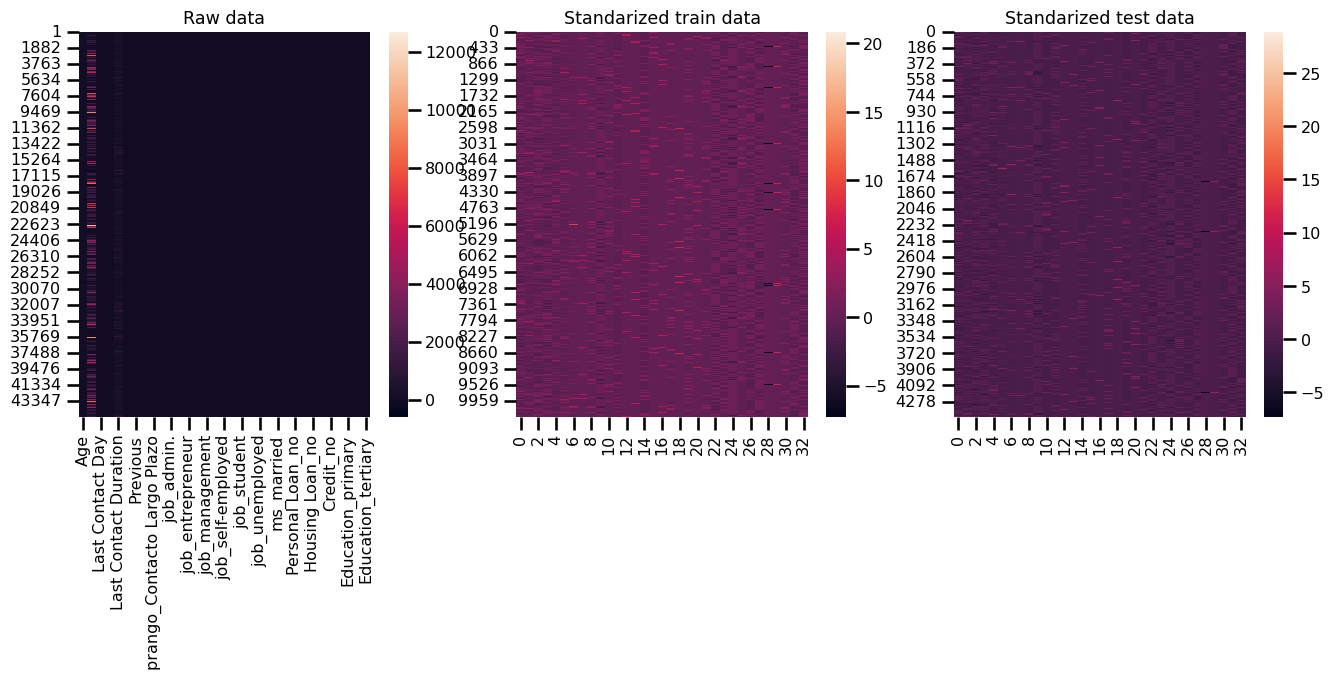

In [103]:
#Escalamos xtrain y xtext
x_train_scaler = scaler.transform(xtrain)
x_test_scaler = scaler.transform(xtest)

# Visualizamos un heatmap para los valores crudos y los estandarizados
fig, axs = plt.subplots(1, 3, figsize=(16,5))
sns.heatmap(x, ax = axs[0])
sns.heatmap(x_train_scaler, ax = axs[1])
sns.heatmap(x_test_scaler, ax = axs[2])
axs[0].set_title('Raw data')
axs[1].set_title('Standarized train data')
axs[2].set_title('Standarized test data')
plt.show()

Observando los heatmaps, vemos como la visualización de los datos crudos es muy dispar porque las features toman valores muy distintos en cuanto a su escala; mientras que en los otros dos tenemos una distribución estandarizada gracias al escalado realizado.

### **Aplicación del Modelo: Logistic Regression**
A continuación, plantearemos el desarrollo del modelo de aprendizaje supervisado Logistic Regression, para el cual definimos distintos hiper-parámetros que van a ser comprobados por GridSearch y con los que luego se entrenará el modelo.

Además, se menciona que para este modelo y los que le siguen, se utilizan dos técnicas para trabajar con el actual dataset, que posee un gran desequilibrio entre clases (como se vio en el EDA). La primera herramienta es el 'class_weight=balanced', que procura balancear justamente este desequilibrio entre clases. En segundo lugar, se hace una estratificación para lograr que las divisiones de entrenamiento se hagan de manera balanceada con las clases.

In [104]:
# Configuramos el modelo de regresión logística
logreg_model = LogisticRegression(max_iter=7000, class_weight='balanced')

# Definimos los hiperparámetros que deseamos probar
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

#Estratificamos los folds para CV ya que tenemos clases desbalanceadas
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=27)

# Configuramos GridSearchCV
logreg_cv = GridSearchCV(estimator=logreg_model, param_grid=param_grid, scoring='accuracy', cv=skf)
logreg_cv.fit(x_train_scaler, ytrain)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=27, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=7000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

Mejores hiperparámetros: {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}


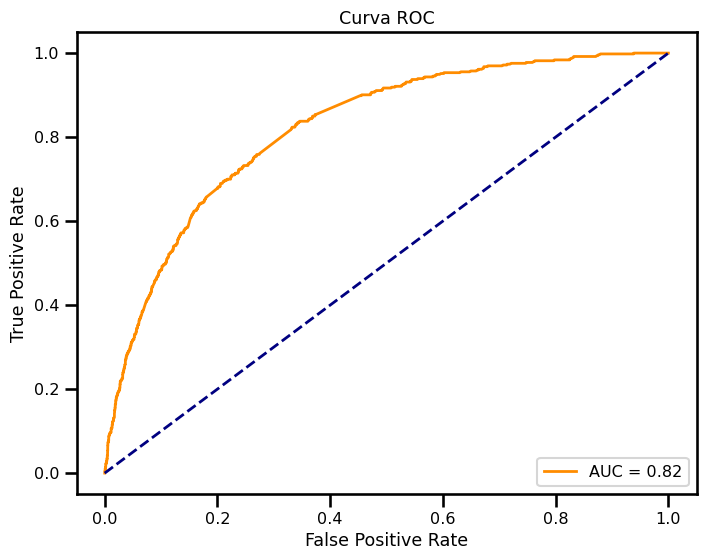

In [105]:
# Obtenemos los mejores hiperparámetros
best_params = logreg_cv.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtenemos el mejor modelo con los mejores hiperparámetros
best_model = logreg_cv.best_estimator_

# Hacemos predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(x_test_scaler)

# Calculamos la curva ROC y el área bajo la curva (AUC)
y_prob = best_model.predict_proba(x_test_scaler)[:, 1]
lr_fpr, lr_tpr, thresholds = roc_curve(ytest, y_prob)
lr_roc_auc = auc(lr_fpr, lr_tpr)

# Graficamos la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, color='darkorange', lw=2, label=f'AUC = {lr_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

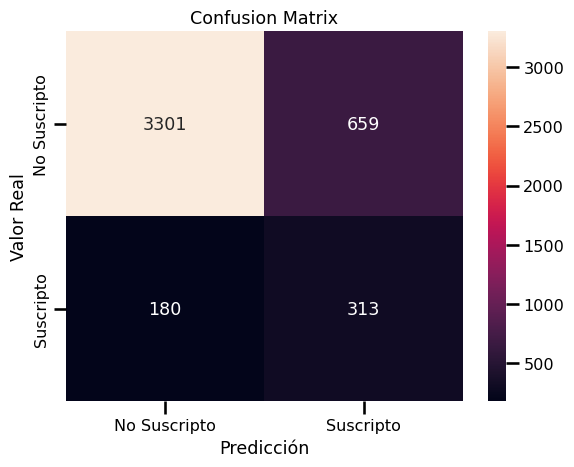

Sensitivity: 0.6349
Specificity: 0.8336
Accuracy: 0.8116


In [106]:
# Generamos la matriz de confusión
cm = confusion_matrix(ytest, y_pred)
    
# Graficamos la matriz
confm = pd.DataFrame(cm, index = ['No Suscripto', 'Suscripto'], columns = ['No Suscripto', 'Suscripto'])
sns.heatmap(confm, annot=True, fmt=".0f")
plt.title('Confusion Matrix')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()
    
# Calculamos True Positives, True Negatives, False Positives y False Negatives
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensitivity_lr = TP / (TP + FN)
specificity_lr = TN / (TN + FP)
accuracy_lr = accuracy_score(ytest, y_pred)

print(f'Sensitivity: {sensitivity_lr:.4f}')
print(f'Specificity: {specificity_lr:.4f}')
print(f'Accuracy: {accuracy_lr:.4f}')
    

Los valores de Accuracy y de Specificity son relativamente buenos, mientras que Sensitivity es baja. Es decir, el modelo clasifica mal los valores verdaderamente suscriptos (los asigna a no suscriptos). 

### **Aplicación del Modelo: SVC**
A continuación, plantearemos el desarrollo del modelo de aprendizaje supervisado SVC, para el cual definimos distintos hiper-parámetros que van a ser comprobados por GridSearch y con los que luego se entrenará el modelo.

In [107]:
# Configuramos el modelo SVC
svc = svm.SVC(class_weight='balanced',probability=True, max_iter=7000)

# Definimos los hiperparámetros que deseamos probar
param_grid_svc = {
    'gamma': [0.01, 0.1, 1, 'auto'],
    'C': [0.1, 1, 10],
    'kernel' : ['rbf','linear']
}

# Configuramos GridSearchCV
svc_cv = GridSearchCV(estimator=svc, param_grid=param_grid_svc, scoring='roc_auc', cv=skf)
svc_cv.fit(x_train_scaler, ytrain)

/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=7000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=7000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=7000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=7000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/s

/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=7000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=7000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=7000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=7000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/s

/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=7000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=7000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=7000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=7000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/s

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=27, shuffle=True),
             estimator=SVC(class_weight='balanced', max_iter=7000,
                           probability=True),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 'auto'],
                         'kernel': ['rbf', 'linear']},
             scoring='roc_auc')

Mejores hiperparámetros: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


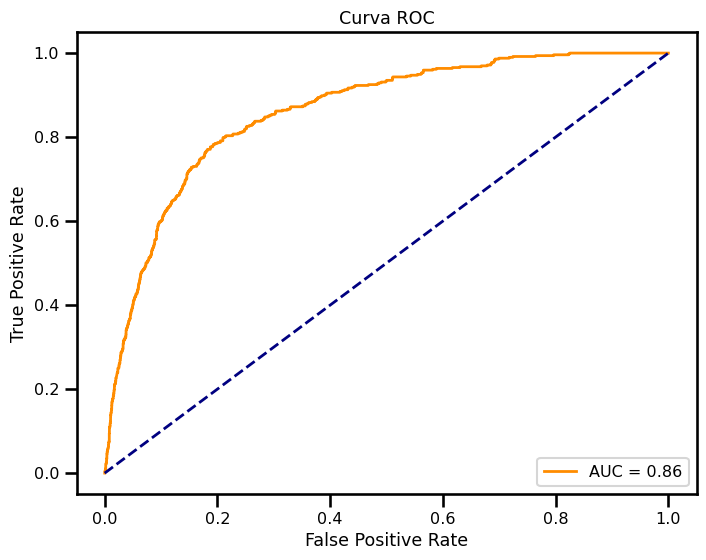

In [108]:
# Obtenemos los mejores hiperparámetros
best_params = svc_cv.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtenemos el mejor modelo con los mejores hiperparámetros
best_model = svc_cv.best_estimator_

# Hacemos predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(x_test_scaler)

# Calculamos la curva ROC y el área bajo la curva (AUC)
y_prob = best_model.predict_proba(x_test_scaler)[:, 1]
svc_fpr, svc_tpr, thresholds = roc_curve(ytest, y_prob)
svc_roc_auc = auc(svc_fpr, svc_tpr)

# Graficamos la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(svc_fpr, svc_tpr, color='darkorange', lw=2, label=f'AUC = {svc_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

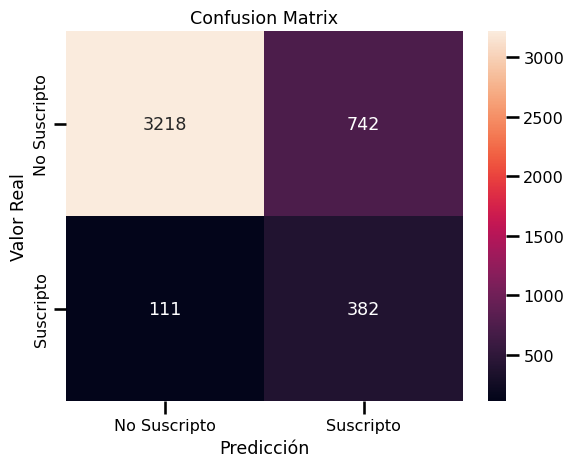

Sensitivity: 0.7748
Specificity: 0.8126
Accuracy: 0.8084


In [109]:
# Generamos la matriz de confusión
cm = confusion_matrix(ytest, y_pred)
    
# Graficamos la matriz
confm = pd.DataFrame(cm, index = ['No Suscripto', 'Suscripto'], columns = ['No Suscripto', 'Suscripto'])
sns.heatmap(confm, annot=True, fmt=".0f")
plt.title('Confusion Matrix')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()
    
# Calculamos True Positives, True Negatives, False Positives y False Negatives
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensitivity_svc = TP / (TP + FN)
specificity_svc = TN / (TN + FP)
accuracy_svc = accuracy_score(ytest, y_pred)

print(f'Sensitivity: {sensitivity_svc:.4f}')
print(f'Specificity: {specificity_svc:.4f}')
print(f'Accuracy: {accuracy_svc:.4f}')
    

Con SVC, las métricas mejoran notablemente, específicamente el área debajo de la curva (AUC) y la sensibilidad. Por lo que, por el momento, es el modelo con mejor rendimiento.

### **Aplicación del Modelo: Linear SVC**
A continuación, plantearemos el desarrollo del modelo de aprendizaje supervisado Linear SVC, para el cual definimos distintos hiper-parámetros que van a ser comprobados por GridSearch y con los que luego se entrenará el modelo.

In [110]:
# Configuramos el modelo SVC
linearsvc = svm.LinearSVC(class_weight='balanced')

# Definimos los hiperparámetros que deseamos probar
param_grid_lsvc = {'C': [0.1, 1, 10]}
    
# Configuramos GridSearchCV
lsvc_cv = GridSearchCV(estimator=linearsvc, param_grid=param_grid_lsvc, scoring='roc_auc', cv=skf)
lsvc_cv.fit(x_train_scaler, ytrain)

/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=27, shuffle=True),
             estimator=LinearSVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10]}, scoring='roc_auc')

Mejores hiperparámetros: {'C': 0.1}


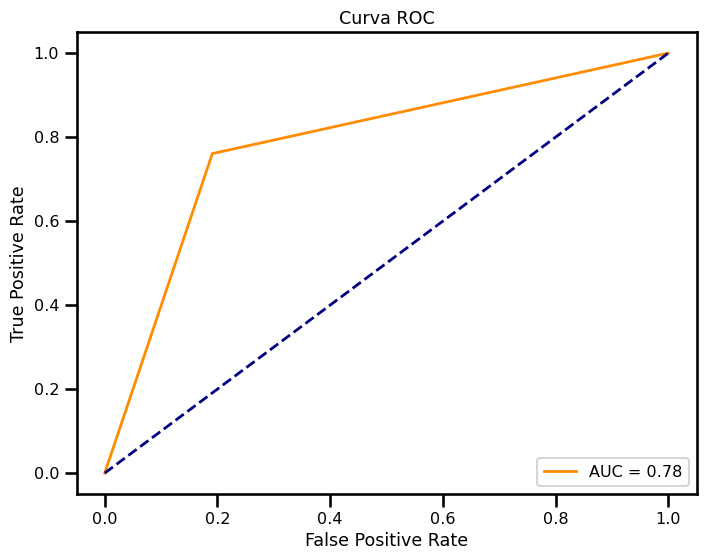

In [111]:
# Obtenemos el mejor hiperparámetro
best_params = lsvc_cv.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtenemos el mejor modelo con el mejor hiperparámetro
best_model = lsvc_cv.best_estimator_

# Hacemos predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(x_test_scaler)

# Calculamos la curva ROC y el área bajo la curva (AUC)
y_prob = best_model.predict(x_test_scaler)
lsvc_fpr, lsvc_tpr, thresholds = roc_curve(ytest, y_prob)
lsvc_roc_auc = auc(lsvc_fpr, lsvc_tpr)

# Graficamos la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(lsvc_fpr, lsvc_tpr, color='darkorange', lw=2, label=f'AUC = {lsvc_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

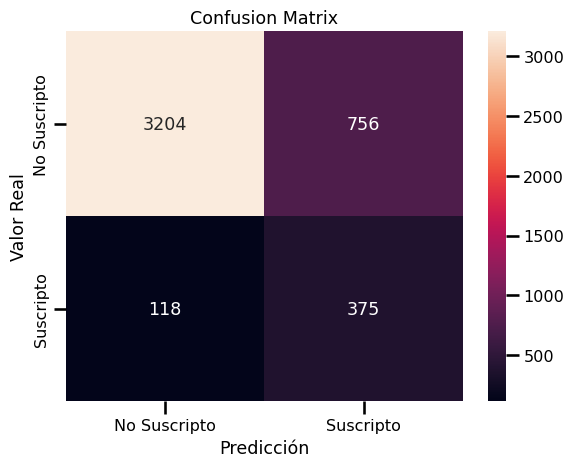

Sensitivity: 0.7606
Specificity: 0.8091
Accuracy: 0.8037


In [112]:
# Generamos la matriz de confusión
cm = confusion_matrix(ytest, y_pred)
    
# Graficamos la matriz
confm = pd.DataFrame(cm, index = ['No Suscripto', 'Suscripto'], columns = ['No Suscripto', 'Suscripto'])
sns.heatmap(confm, annot=True, fmt=".0f")
plt.title('Confusion Matrix')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()
    
# Calculamos True Positives, True Negatives, False Positives y False Negatives
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensitivity_lsvc = TP / (TP + FN)
specificity_lsvc = TN / (TN + FP)
accuracy_lsvc = accuracy_score(ytest, y_pred)

print(f'Sensitivity: {sensitivity_lsvc:.4f}')
print(f'Specificity: {specificity_lsvc:.4f}')
print(f'Accuracy: {accuracy_lsvc:.4f}')
    

Por más que las métricas obtenidas en la matriz de confusión no empeoran en gran medida con respecto al SVC, el área bajo la curva (AUC) tiene un importante descenso, por lo que no llega a mejorar el rendimiento del modelo anterior.

### Comparación entre Modelos
A continuación, compararemos las métricas obtenidas con Logistic Regression, SVC y Linear SVC.

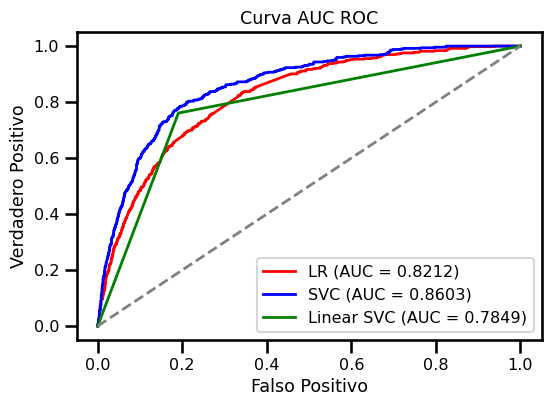

In [113]:
# Graficamos la curva AUC ROC para los modelos
plt.figure(figsize=(6, 4))

# Plot para LR
plt.plot(lr_fpr, lr_tpr, color='red', lw=2, label='LR (AUC = {:.4f})'.format(lr_roc_auc))
# Plot para SVC
plt.plot(svc_fpr, svc_tpr, color='blue', lw=2, label='SVC (AUC = {:.4f})'.format(svc_roc_auc))
# Plot para Linear SVC
plt.plot(lsvc_fpr, lsvc_tpr, color='green', lw=2, label='Linear SVC (AUC = {:.4f})'.format(lsvc_roc_auc))
# Plot para línea diagonal
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Etiquetas y titulos
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadero Positivo')
plt.title('Curva AUC ROC')
plt.legend()

# Mostramos el gráfico
plt.show()

In [114]:
# Creamos una tabla comparativa para los valores obtenidos de la Matriz de Confusión
data = {
    'Métrica': ['Sensitivity', 'Specificity', 'Accuracy'],
    'LR': [sensitivity_lr, specificity_lr, accuracy_lr],
    'SVC': [sensitivity_svc, specificity_svc, accuracy_svc],
    'LinearSVC': [sensitivity_lsvc, specificity_lsvc, accuracy_lsvc],
}

metricas_modelos = pd.DataFrame(data)
metricas_modelos

,Métrica,LR,SVC,LinearSVC
0,Sensitivity,0.634888,0.774848,0.760649
1,Specificity,0.833586,0.812626,0.809091
2,Accuracy,0.811588,0.808444,0.803728


Analizando todas las métricas, consideramos que SVC es el modelo de aprendizaje que mejor se ajusta a nuestros datos, con un kernel radial (rbf), un costo de 1 y un gamma 0,01. A continuación, se realizará un análisis de reducción de dimensionalidad con Principal Component Analysis (PCA).

### PCA (Modelo de Reducción de la dimensionalidad)
Se realizaron diversas pruebas para identificar en qué momento las features dejan de tener variabilidad y, como se muestra a continuación, observamos que a partir de la variable 27 la varianza toma un valor de 5,47e-31. Por lo tanto, haremos la reducción extrayendo 26 componentes. 

In [155]:
# Cantidad de componentes a extraer
n_comps27 = 27
# Definimos PCA
pca27 = PCA(n_components= n_comps27)
# Transformamos nuestros datos
xpca_train = pd.DataFrame(pca27.fit_transform(x_train_scaler))
xpca_test = pd.DataFrame(pca27.fit_transform(x_test_scaler))

In [156]:
#Obtenemos los autovalores (sigma)
pca27.explained_variance_

array([2.77857376e+00, 2.72538019e+00, 2.42329062e+00, 2.12141646e+00,
       2.05922132e+00, 1.93802233e+00, 1.52557231e+00, 1.39764086e+00,
       1.22561366e+00, 1.16306589e+00, 1.13905072e+00, 1.12139898e+00,
       1.10870430e+00, 1.06378334e+00, 1.04865487e+00, 1.03236991e+00,
       1.02032140e+00, 9.67588312e-01, 9.30980997e-01, 8.58083888e-01,
       8.15249354e-01, 7.40295505e-01, 7.29233143e-01, 4.96595875e-01,
       4.63275530e-01, 3.90493429e-01, 5.47977051e-31])

In [157]:
# Cantidad de componentes a extraer
n_comps = 26
# Definimos PCA
pca = PCA(n_components= n_comps)
# Transformamos nuestros datos
xpca_train = pd.DataFrame(pca.fit_transform(x_train_scaler))
xpca_test = pd.DataFrame(pca.fit_transform(x_test_scaler))

In [159]:
#Obtenemos los autovalores (sigma)
pca.explained_variance_

array([2.77857376, 2.72538019, 2.42329062, 2.12141646, 2.05922132,
       1.93802233, 1.52557231, 1.39764086, 1.22561366, 1.16306589,
       1.13905072, 1.12139898, 1.1087043 , 1.06378334, 1.04865487,
       1.03236991, 1.0203214 , 0.96758831, 0.930981  , 0.85808389,
       0.81524935, 0.7402955 , 0.72923314, 0.49659588, 0.46327553,
       0.39049343])

In [160]:
#Obtenemos los autovalores (como porcentaje)
eigenvalues=pca.explained_variance_ratio_
eigenvalues

array([0.08348107, 0.08188289, 0.07280674, 0.06373706, 0.06186843,
       0.05822706, 0.04583517, 0.04199153, 0.03682304, 0.03494382,
       0.0342223 , 0.03369196, 0.03331055, 0.03196092, 0.03150639,
       0.03101712, 0.03065512, 0.02907078, 0.02797093, 0.02578077,
       0.02449382, 0.02224187, 0.0219095 , 0.01492001, 0.01391892,
       0.01173221])

In [161]:
# Observamos el shape de la matriz obtenida del PCA. Ver que nuestro dataset se redujo de 36 a 25 dimensiones
xpca_train.shape

(10390, 26)

<Axes: >

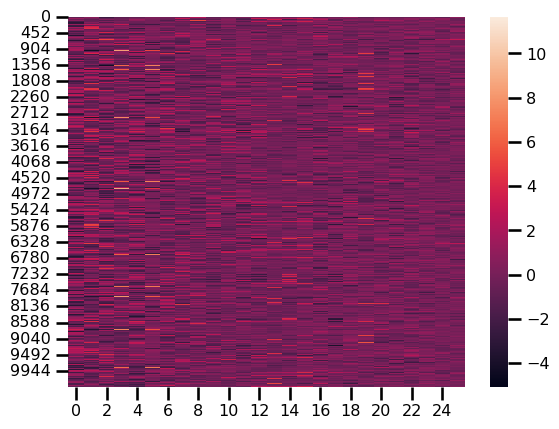

In [162]:
sns.heatmap(xpca_train)

En el heatmap, observamos como todas las features tienen gran variabilidad por su diversidad de colores.

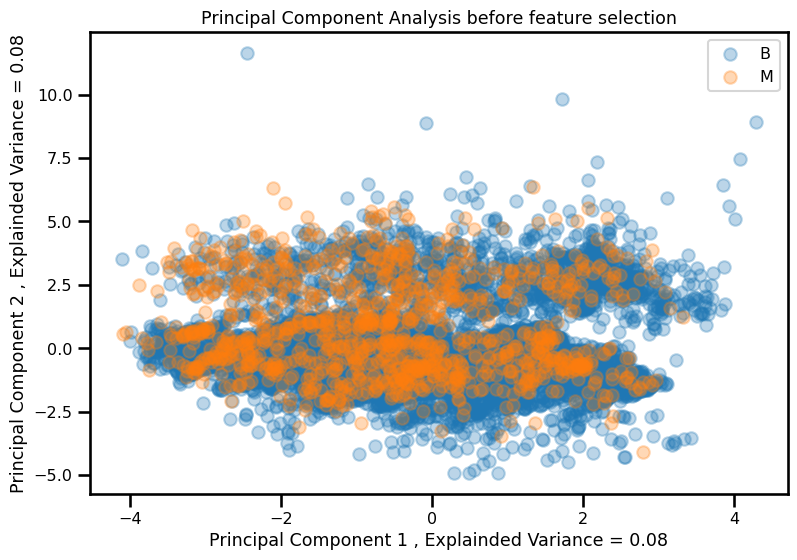

In [163]:
# Graficamos en 2D las primeras dos columnas de la matriz obtenida con PCA
sns.set_context("talk", font_scale=0.7)
plt.figure(figsize=(9,6))
plt.scatter(xpca_train.loc[(ytrain == 0).ravel(),0],xpca_train.loc[(ytrain == 0).ravel(),1], alpha = 0.3, label = 'B')
plt.scatter(xpca_train.loc[(ytrain == 1).ravel(),0],xpca_train.loc[(ytrain == 1).ravel(),1], alpha = 0.3, label = 'M')
plt.xlabel('Principal Component 1 , Explainded Variance = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance = ' + str(np.round(eigenvalues[1],2)))
plt.title('Principal Component Analysis before feature selection')
plt.legend(loc='upper right')
plt.show()

En 2D no se observa una distribución que permita diferenciar el comportamiento de las dos clases. 

### Análisis del Modelo con sus dimensiones reducidas
Aplicamos el modelo SVC con las dimensiones reducidas.

In [164]:
# Configuramos el modelo SVC
svc = svm.SVC(class_weight='balanced',probability=True, max_iter=7000)

# Definimos los hiperparámetros que deseamos probar
param_grid_svc = {
    'gamma': [0.01, 0.1, 1, 'auto'],
    'C': [0.1, 1, 10],
    'kernel' : ['rbf','linear']
}

# Configuramos GridSearchCV
xsvc_cv = GridSearchCV(estimator=svc, param_grid=param_grid_svc, scoring='roc_auc', cv=skf)
xsvc_cv.fit(xpca_train, ytrain)

/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=7000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=7000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=7000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=7000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/s

/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=7000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=7000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=7000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=7000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/s

/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=7000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=7000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=7000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=7000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/oliviafranco/anaconda3/lib/python3.11/site-packages/s

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=27, shuffle=True),
             estimator=SVC(class_weight='balanced', max_iter=7000,
                           probability=True),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 'auto'],
                         'kernel': ['rbf', 'linear']},
             scoring='roc_auc')

Mejores hiperparámetros: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


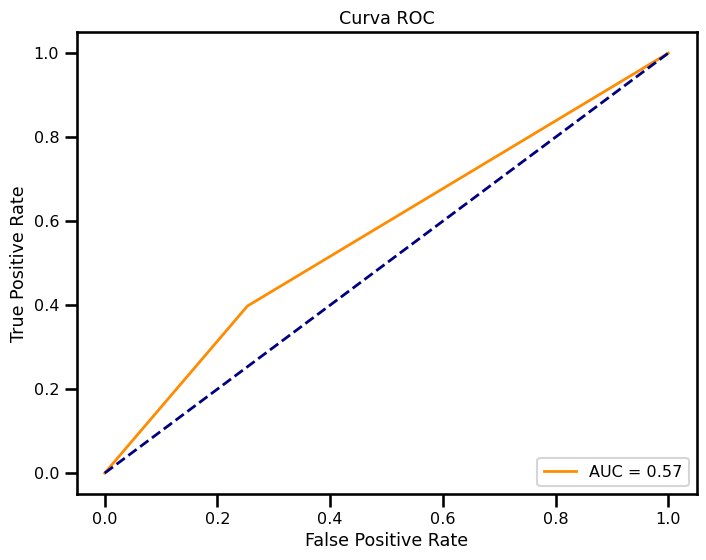

In [165]:
# Obtenemos los mejores hiperparámetros
best_params = xsvc_cv.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtenemos el mejor modelo con los mejores hiperparámetros
best_model = xsvc_cv.best_estimator_

# Hacemos predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(xpca_test)

# Calculamos la curva ROC y el área bajo la curva (AUC)
y_prob = best_model.predict(xpca_test)
xsvc_fpr, xsvc_tpr, thresholds = roc_curve(ytest, y_prob)
xsvc_roc_auc = auc(xsvc_fpr, xsvc_tpr)

# Graficamos la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(xsvc_fpr, xsvc_tpr, color='darkorange', lw=2, label=f'AUC = {xsvc_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

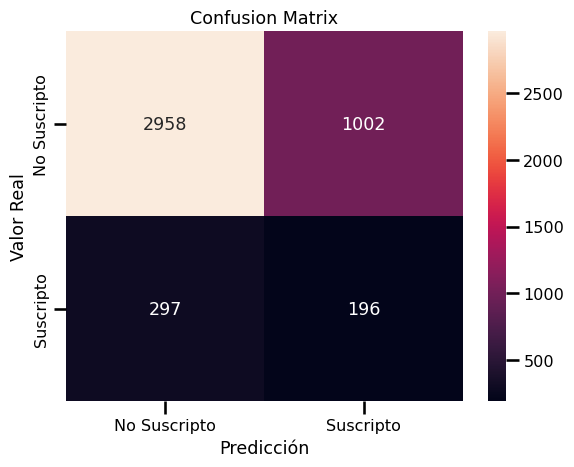

Sensitivity: 0.3976
Specificity: 0.7470
Accuracy: 0.7083


In [166]:
# Generamos la matriz de confusión
cm = confusion_matrix(ytest, y_pred)
    
# Graficamos la matriz
confm = pd.DataFrame(cm, index = ['No Suscripto', 'Suscripto'], columns = ['No Suscripto', 'Suscripto'])
sns.heatmap(confm, annot=True, fmt=".0f")
plt.title('Confusion Matrix')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()
    
# Calculamos True Positives, True Negatives, False Positives y False Negatives
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensitivity_xsvc = TP / (TP + FN)
specificity_xsvc = TN / (TN + FP)
accuracy_xsvc = accuracy_score(ytest, y_pred)

print(f'Sensitivity: {sensitivity_xsvc:.4f}')
print(f'Specificity: {specificity_xsvc:.4f}')
print(f'Accuracy: {accuracy_xsvc:.4f}')
    

Dado que obtenemos resultados muy inferiores a los obtenidos por el SVC sin reducción de dimensionalidad, es con el modelo previamente presentado que se realizarán las predicciones. Por lo tanto, a modo de conclusión, se utilizará un modelo SVC con kernel radial, costo 1 y gamma 0,01; obteniendo unas métricas de:
- AUC: 0,86
- Sensibility: 0,7748
- Specificity: 0,8126
- Accuracy: 0,8084